# Image reshaping for Tensorflow

The following notebook demonstrates how to read and manipulate images using the Tensorflow library.

References: 
- https://www.tensorflow.org/api_docs/python/tf/image/resize_images 
- https://learningtensorflow.com/lesson3/
- https://stackoverflow.com/questions/39952592/tf-image-decode-jpeg-raise-invalidargumenterror

In [25]:
%%html
<style>
table {float:left;}
th {font-size: 20px}
td {font-size:16px;}
</style>

||Table of Contents|
|-|:-------------------|
|1)|    Reading an image as a Tensorflow Variable|
|2)|    Reshaping an image|
|3)|    Resizing images with cropping/padding|
|4)|    Converting images to different colorspaces|

## 1. Plotting on a graph via Tensorflow

/Users/kch31/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Type: <class 'numpy.ndarray'>,
Shape: (268, 189, 3)
X:  <tf.Variable 'x:0' shape=(268, 189, 3) dtype=float32_ref>


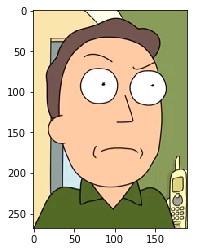

In [1]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, read the image as a numpy.ndarray
image = mpimg.imread("characters/jerry.png")

x = tf.Variable(image, name='x') # Create a TensorFlow Variable

model = tf.global_variables_initializer() # Initialise all tf variables

print("Type: {},\nShape: {}".format(type(image), image.shape))
print("X: ", x)

with tf.Session() as session:
    session.run(model)
    result = session.run(x)

plt.imshow(result) #Visualise
plt.show()

## 2. Reshaping the image 

References: 
- https://www.tensorflow.org/api_docs/python/tf/image/resize_images 

The following code demonstrates how to reduce the resolution of the image by resizing the raw data.

The **set_shape()** method is used as the file_contents does not allow for the decoded png to be read when creating as a tf.Variable. 

Other parameters options for the **resize_image()** method include:
- ResizeMethod.BILINEAR
- ResizeMethod.NEAREST_NEIGHBOR (Best human results)
- ResizeMethod.BICUBIC
- ResizeMethod.AREA

Rescale percentage:  60.0 %
Rescaled image to contain 160 rows and 113 columns
Resized Shape:  (160, 113, 3)


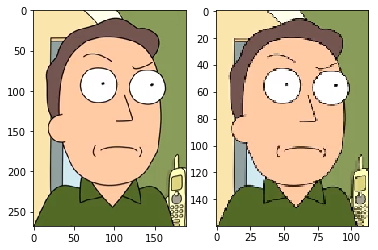

In [4]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read Image and convert to tf Variable
image = mpimg.imread("characters/jerry.png") 
image_tf = tf.Variable(image)

# Set a rescale value
rescale_percentage = 0.6
rescaled_row = int(original_shape[0] * rescale_percentage)
rescaled_col = int(original_shape[1] * rescale_percentage)

print("Rescale percentage: ", rescale_percentage * 100, "%")
print("Rescaled image to contain %s rows and %s columns" % (rescaled_row, rescaled_col))

resize_shape = tf.stack([rescaled_row,rescaled_col])
resized_image = tf.image.resize_images(
    image_tf, 
    resize_shape,
    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR
)
print("Resized Shape: ", resized_image.get_shape())

# Create a TensorFlow Variable
x = tf.Variable(image_tf, name='x')
y = tf.Variable(resized_image, name='y')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    original = session.run(x)
    resized = session.run(y)
        
fig, axarr = plt.subplots(1,2)
axarr[0].imshow(original)
axarr[1].imshow(resized)
plt.show()

## 3. Resizing images with cropping/padding

References: https://www.tensorflow.org/api_docs/python/tf/image/resize_image_with_crop_or_pad 

Use the **resize_image_with_crop_or_pad()** method.

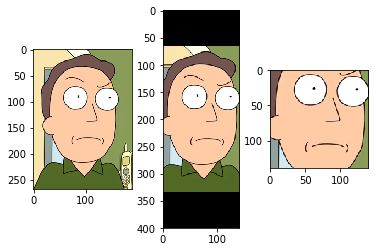

In [7]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image and graph the shape of the image.
image = mpimg.imread("characters/jerry.png")
img_tf = tf.Variable(image)

resize_shape = tf.stack([rescaled_row,rescaled_col])
padded_image = tf.image.resize_image_with_crop_or_pad(
    img_tf, 400, 140)

cropped_image = tf.image.resize_image_with_crop_or_pad(
    img_tf, 140,140)

# # Create a TensorFlow Variable
x = tf.Variable(image_tf, name='x')
y = tf.Variable(padded_image, name='y')
z = tf.Variable(cropped_image, name='z')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    original = session.run(x)
    padded = session.run(y)
    cropped = session.run(z)
    
fig, axarr = plt.subplots(1,3)
axarr[0].imshow(original)
axarr[1].imshow(padded)
axarr[2].imshow(cropped)

plt.show()

# 4. Converting images to different colorspaces

Methods used:
- tf.image.convert_image_dtype()
- tf.rgb_to_grayscale()
- tf.squeeze()
- tf.rgb_to_hsv() 

Reference: https://www.tensorflow.org/api_docs/python/tf/image/convert_image_dtype

Squeezed shape:  (268, 189)


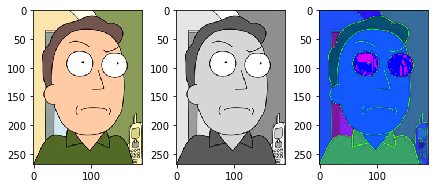

In [10]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image and graph the shape of the image.
image = mpimg.imread("characters/jerry.png")
image_tf = tf.Variable(image)

rgb_image_float = tf.image.convert_image_dtype(image_tf, tf.float32)

#gray_scale image
grayscale_image = tf.image.rgb_to_grayscale(rgb_image_float)
shape = original_shape[:2]
squeezed_image = tf.squeeze(grayscale_image)
print("Squeezed shape: ", squeezed_image.get_shape())

#hsv image
hsv_image = tf.image.rgb_to_hsv(rgb_image_float)

# Create a TensorFlow Variable
x = tf.Variable(image_tf, name='x')
y = tf.Variable(squeezed_image, name='y')
z = tf.Variable(hsv_image, name='z')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    original = session.run(x)
    gray = session.run(y)
    hsv = session.run(z)
    
fig, axarr = plt.subplots(1,3)
axarr[0].imshow(original)
gray_plot = axarr[1].imshow(gray)
gray_plot.set_cmap('gray')
axarr[2].imshow(hsv)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) # Applying padding
plt.show()